In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import linear_model

In [4]:
# 데이터 불러오기
# 시계열데이터는 처음 입력이 없기 때문에 NaN이 존재할 수 밖에 없음

h_stock = pd.read_csv('./data/H_stock.csv')  # H 회사 주식
s_stock = pd.read_csv('./data/S_stock.csv')  # S 회사 주식
k_index = pd.read_csv('./data/K_index.csv')  # KOSPI

In [5]:
print(h_stock.head())
print()
print(s_stock.head())
print()
print(k_index.head())

         date  h_price  h_rate
0  2015-03-25    45500     NaN
1  2015-03-26    45900   0.879
2  2015-03-27    45000  -1.961
3  2015-03-30    45600   1.333
4  2015-03-31    46000   0.877

         date  s_price  s_rate
0  2015-03-25  1485000     NaN
1  2015-03-26  1421000  -4.310
2  2015-03-27  1421000   0.000
3  2015-03-30  1428000   0.493
4  2015-03-31  1441000   0.910

         date    kospi  k_rate
0  2015-03-25  2042.81     NaN
1  2015-03-26  2022.56  -0.991
2  2015-03-27  2019.80  -0.136
3  2015-03-30  2030.04   0.507
4  2015-03-31  2041.03   0.541


In [8]:
# NaN 있는 헤더 정보 제거 : dropna()
# DataFrame -> np.array로 변경

h_rate = np.array(h_stock.h_rate[1:])
s_rate = np.array(s_stock.s_rate[1:])
k_rate = np.array(k_index.k_rate[1:])

In [11]:
print(h_rate,h_rate.shape, s_rate, s_rate.shape, k_rate, k_rate.shape, sep='\n\n')

[ 0.879 -1.961  1.333  0.877 -0.109  0.762  0.756 -1.929 -0.874 -3.638
 -1.373  1.276 -0.802  1.386 -0.228  5.023  3.37  -2.734 -0.432 -1.194
  0.659  2.293  0.32   2.021 -0.521 -1.782  2.348 -2.92  -0.644 -0.973
  2.183  0.641  0.212 -0.847  0.    -0.214 -1.285  3.905 -0.939  2.213
 -3.093 -2.66  -0.109  1.094 -1.515  0.769 -1.2   -1.766  0.674  0.
 -0.223 -2.237  0.343 -0.798  0.69  -1.826 -0.698 -0.585  3.887  4.762
 -0.325 -1.303 -0.77   0.222 -0.885  2.232  1.201  0.539  0.644  0.213
 -0.957  1.504  1.693 -1.353  1.266  2.083  0.102 -0.306  0.307  1.733
  1.002 -3.472  2.261 -3.216 -1.038  1.154  0.622  0.206  4.733  2.554
 -0.958 -0.193 -0.969 -0.196  0.588 -1.949 -0.994 -0.402  1.815  0.594
 -0.394  2.174 -4.255 -3.636 -0.419  3.474  0.712 -0.606 -2.439  1.042
 -1.753 -0.315 -1.579  1.176 -2.114  2.916  3.358 -2.437  1.249  0.
  0.103 -2.156 -0.315 -0.211  4.852 -2.817  1.035  0.512 -0.102  0.
 -1.531  1.451  0.511 -1.728  0.    -0.207  0.104  3.416  1.301  1.581
  0.778  0.965 

In [13]:
# 선형회귀모델 함수에 넣기 위해서 reshape를 사용하여 차원 조정
# (248,) >> (248,1)

h_rate = h_rate.reshape(h_rate.shape[0],1)
s_rate = s_rate.reshape(s_rate.shape[0],1)
k_rate = k_rate.reshape(k_rate.shape[0],1)

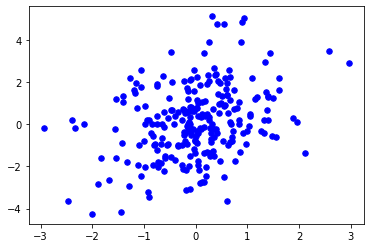

In [15]:
# 산점도 그리기 (k_rate와 h_rate 비교)
# x : k_rate , y:h_rate

plt.scatter(k_rate, h_rate, c='blue', s=30, marker='o')

### 모델링

In [16]:
model = linear_model.LinearRegression()
model.fit(k_rate, h_rate)

LinearRegression()

In [17]:
model.predict(k_rate)

array([[-5.02823664e-01],
       [ 3.99487981e-02],
       [ 4.48139082e-01],
       [ 4.69723017e-01],
       [-2.64765567e-01],
       [ 1.45964004e-01],
       [ 6.37950739e-01],
       [ 1.57390793e-01],
       [ 1.44694361e-01],
       [ 5.05273026e-01],
       [ 1.14222924e-01],
       [ 1.01693923e+00],
       [ 4.65914087e-01],
       [ 5.13525707e-01],
       [ 3.73864956e-01],
       [ 7.23651654e-01],
       [ 2.32934562e-01],
       [ 2.21507774e-01],
       [ 6.97854129e-02],
       [ 9.96220278e-02],
       [ 1.00043387e+00],
       [-2.71113783e-01],
       [ 5.96282675e-02],
       [-1.63828933e-01],
       [-2.28985396e-02],
       [-3.32056655e-01],
       [ 2.77372074e-01],
       [-6.97079072e-01],
       [-2.83175393e-01],
       [-4.00387227e-02],
       [ 4.87498021e-01],
       [ 1.07874709e-01],
       [ 6.52551635e-01],
       [ 3.11652440e-01],
       [-2.87619144e-01],
       [ 3.44028341e-01],
       [ 3.40219412e-01],
       [ 6.85562358e-01],
       [-3.7

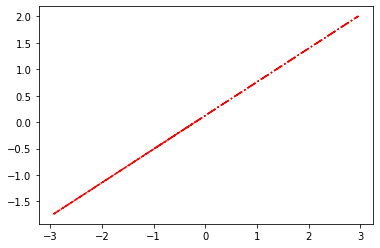

In [18]:
# 실제값(y)와 예측값(y_hat) 비교
plt.plot(k_rate, model.predict(k_rate), linestyle='-.', c='r')

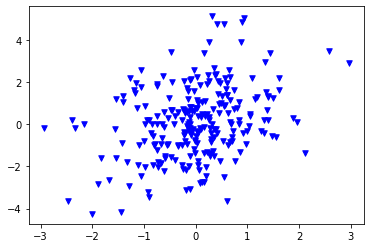

In [19]:
# k_rate, h_rate 관계성 확인
plt.scatter(k_rate, h_rate, c='b', s=30, marker='v')

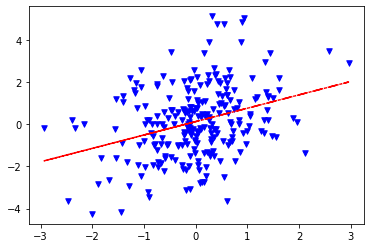

In [20]:
plt.scatter(k_rate, h_rate, c='b', s=30, marker='v')
plt.plot(k_rate, model.predict(k_rate), linestyle='-.', c='r')

In [22]:
print('기울기:', model.coef_) 
print('절편:', model.intercept_)
print('결정계수:', model.score(k_rate, h_rate))

# 기울기:  [[0.63482159]]
# 코스피 지표(k_rate)와 h회사 주가변동(h_rate)간 63% 관계가 있음(영향력이 있음)

기울기: [[0.63482159]]
절편: [0.12628453]
결정계수: 0.1064571423759525


기울기: [[1.00132771]]
절편: [-0.03500143]
결정계수: 0.2644483831226938


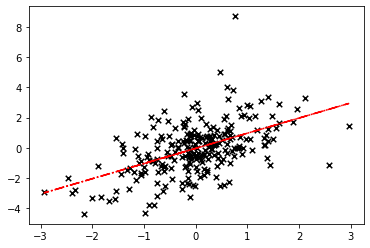

In [24]:
plt.scatter(k_rate, s_rate, c='black', s=30, marker='x')

model = linear_model.LinearRegression()
model.fit(k_rate, s_rate)

plt.plot(k_rate, model.predict(k_rate), linestyle='-.', label='s_stock', c='r')

print('기울기:', model.coef_) 
print('절편:', model.intercept_)
print('결정계수:', model.score(k_rate, s_rate))

# 코스피지수 변동(k_rate)이 s회사의 주가 변동(s_rate)dp 100% 가까운 영향력을 끼치고 있다.
# 베타지수(beta_index) 크면 공격성향이 큰 주가로 판단